<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
train_data = train_data.drop(["Alley","PoolQC", "Fence", "MiscFeature"], axis=1)

In [4]:
y = train_data["SalePrice"]
X = train_data.iloc[:, :-1]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
X = X.apply(LabelEncoder().fit_transform)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,variable
0,4.241049,Id
1,11.767918,MSSubClass
2,31.157036,MSZoning
3,5.570519,LotFrontage
4,8.115459,LotArea
...,...,...
71,1.148829,MiscVal
72,5.261800,MoSold
73,3.133686,YrSold
74,27.889004,SaleType


In [8]:
vif.to_csv('vif.csv') 

In [9]:
X.drop(["MSZoning", "Street", "LandContour", "Condition2", "OverallQual", 
        "OverallCond", "YearBuilt", "Exterior1st", "Exterior2nd",
        "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType2",
        "BsmtUnfSF", "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF",
        "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
        "TotRmsAbvGrd", "Functional", "FireplaceQu", "GarageYrBlt", "GarageCars",
        "GarageQual", "GarageCond", "PavedDrive", "SaleType"], axis=1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,5,36,327,3,0,4,0,5,2,...,0,49,0,0,0,0,0,1,2,4
1,1,0,51,498,3,0,2,0,24,1,...,187,0,0,0,0,0,0,4,1,4
2,2,5,39,702,0,0,4,0,5,2,...,0,30,0,0,0,0,0,8,2,4
3,3,6,31,489,0,0,0,0,6,2,...,0,24,108,0,0,0,0,1,0,0
4,4,5,55,925,0,0,2,0,15,2,...,118,70,0,0,0,0,0,11,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,5,33,267,3,0,4,0,8,2,...,0,28,0,0,0,0,0,7,1,4
1456,1456,0,56,866,3,0,4,0,14,2,...,214,0,0,0,0,0,0,1,4,4
1457,1457,6,37,415,3,0,4,0,6,2,...,0,48,0,0,0,0,17,4,4,4
1458,1458,0,39,505,3,0,4,0,12,2,...,224,0,38,0,0,0,0,3,4,4


#Let's try linear regression first

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.score(X, y)

0.8551352771608627

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)

array([0.87527957, 0.82129005, 0.83126199, 0.84813308, 0.75327747])

In [32]:
print(scores.mean())

0.8258484338904925


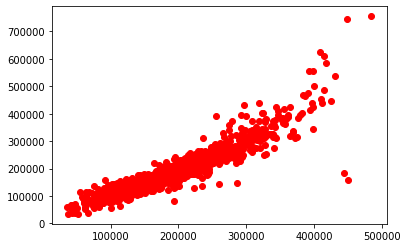

In [25]:
plt.scatter(y_pred, y, color="red")

In [13]:
X_test = pd.read_csv("test.csv")

In [15]:
X_test = X_test.drop(["Alley","PoolQC", "Fence", "MiscFeature"], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test = X_test.apply(LabelEncoder().fit_transform)
X_test.drop(["MSZoning", "Street", "LandContour", "Condition2", "OverallQual", 
        "OverallCond", "YearBuilt", "Exterior1st", "Exterior2nd",
        "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType2",
        "BsmtUnfSF", "TotalBsmtSF", "Heating", "CentralAir", "1stFlrSF",
        "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
        "TotRmsAbvGrd", "Functional", "FireplaceQu", "GarageYrBlt", "GarageCars",
        "GarageQual", "GarageCond", "PavedDrive", "SaleType"], axis=1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,0,0,56,777,3,0,4,0,12,1,...,75,0,0,0,18,0,0,5,4,4
1,1,0,57,964,0,0,0,0,12,2,...,225,24,0,0,0,0,24,5,4,4
2,2,5,50,947,0,0,4,0,8,2,...,134,22,0,0,0,0,0,2,4,4
3,3,5,54,587,0,0,4,0,8,2,...,219,24,0,0,0,0,0,5,4,4
4,4,11,19,118,0,0,4,0,22,2,...,0,68,0,0,27,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,13,0,19,3,0,4,0,10,2,...,0,0,0,0,0,0,0,5,0,4
1455,1455,13,0,17,3,0,4,0,10,2,...,0,12,0,0,0,0,0,3,0,0
1456,1456,0,112,1069,3,0,4,0,11,2,...,245,0,0,0,0,0,0,8,0,0
1457,1457,9,38,647,3,0,4,0,11,2,...,37,20,0,0,0,0,12,6,0,4


In [18]:
y_test_pred = lin_reg.predict(X_test)
y_test_pred

array([111793.30497853, 159446.97707904, 177661.68925319, ...,
       172676.58933492, 111827.32090381, 251839.83629224])

In [20]:
y_pred = lin_reg.predict(X)
y_pred

array([216583.51292807, 210375.69282153, 218121.25967534, ...,
       251311.85630969, 147239.24985276, 164829.69677269])

IndexError: ignored